Import libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

Import functions.

In [3]:
def data_info(table):
    table.info(memory_usage='deep')
    display(table.head(5))

def unique_check(table,column):
    max_value = table[column].max()
    min_value = table[column].min()
    display(max_value,min_value)
    display(table[column].value_counts())
    
def corr_info(table):
    table.corr()
    heatmap0 = sns.heatmap(table.corr(), 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 1, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
    plt.show()
    plt.figure(figsize=(30,15))
    
def outlier_treatment(table,column):
    sorted(table[column])
    Q1,Q3 = np.percentile(table[column], [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    number_of_outliers = ((table[column] < lower_range) | (table[column] > upper_range)).sum()
    percentage_of_outliers = "{:.3%}".format(number_of_outliers/len(table[column]))
    stats = []
    stats.append([lower_range,upper_range,number_of_outliers,percentage_of_outliers])
    stats_df = pd.DataFrame(stats,columns = ['lower_range','upper_range','number_of_outliers','percentage_of_outliers'])
    display(stats_df)
    return 


In [4]:
df_gold_recovery_train = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/4_gold_recovery_train.csv', index_col = 'date')
df_gold_recovery_train.index = pd.to_datetime(df_gold_recovery_train.index)
df_gold_recovery_train = df_gold_recovery_train.replace(0.,np.nan)
df_gold_recovery_test = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/4_gold_recovery_test.csv', index_col = 'date')
df_gold_recovery_test.index = pd.to_datetime(df_gold_recovery_test.index)
df_gold_recovery_test = df_gold_recovery_test.replace(0.,np.nan)
df_gold_recovery_full = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/4_gold_recovery_full.csv', index_col = 'date')
df_gold_recovery_full.index = pd.to_datetime(df_gold_recovery_full.index)
df_gold_recovery_full = df_gold_recovery_full.replace(0.,np.nan)

In [5]:
data_info(df_gold_recovery_train)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         15525 non-null  float64
 1   final.output.concentrate_pb                         15525 non-null  float64
 2   final.output.concentrate_sol                        15227 non-null  float64
 3   final.output.concentrate_au                         15526 non-null  float64
 4   final.output.recovery                               15250 non-null  float64
 5   final.output.tail_ag                                15136 non-null  float64
 6   final.output.tail_pb                                15019 non-null  float64
 7   final.output.tail_sol                               15057 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_info(df_gold_recovery_test)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5747 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5752 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5792 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_info(df_gold_recovery_full)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         21014 non-null  float64
 1   final.output.concentrate_pb                         21016 non-null  float64
 2   final.output.concentrate_sol                        20718 non-null  float64
 3   final.output.concentrate_au                         21017 non-null  float64
 4   final.output.recovery                               20602 non-null  float64
 5   final.output.tail_ag                                20683 non-null  float64
 6   final.output.tail_pb                                20566 non-null  float64
 7   final.output.tail_sol                               20495 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Let's check that efficiency calculated correctly for rougher.output.recovery. MAE will check the correction.
   
Where:
- F — gold concentration in raw materials before flotation/cleaning;
- C — gold concentration in concetrate after flotation/cleaning;
- T —  gold concentration in residuals after flotation/cleaning .
    

In [8]:
df_gold_recovery_train['rougher.output.recovery_check'] = (df_gold_recovery_train['rougher.output.concentrate_au'] * (df_gold_recovery_train['rougher.input.feed_au'] - df_gold_recovery_train['rougher.output.tail_au'])) / (df_gold_recovery_train['rougher.input.feed_au'] * (df_gold_recovery_train['rougher.output.concentrate_au'] - df_gold_recovery_train['rougher.output.tail_au']))*100
gold_interest = ['rougher.output.recovery','rougher.output.recovery_check']
df_gold_recovery_train_test = df_gold_recovery_train[gold_interest]
df_gold_recovery_train_test = df_gold_recovery_train_test.dropna()
data_info(df_gold_recovery_train_test)
df_gold_recovery_train_test_mae = mean_absolute_error(df_gold_recovery_train_test['rougher.output.recovery'],df_gold_recovery_train_test['rougher.output.recovery_check'])
print('MAE:',df_gold_recovery_train_test_mae)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13967 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.recovery        13967 non-null  float64
 1   rougher.output.recovery_check  13967 non-null  float64
dtypes: float64(2)
memory usage: 327.4 KB


,rougher.output.recovery,rougher.output.recovery_check
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794


MAE: 9.516567545612377e-15


Test is mostly the sample, that has data nescessary for calculations. All others are derivative.

In [9]:
test_columns = df_gold_recovery_test.columns
train_dataframe_left = df_gold_recovery_train.drop(test_columns, axis=1)
train_dataframe_left = train_dataframe_left.drop('rougher.output.recovery_check',axis=1)
data_info(train_dataframe_left)
#display(corr_info(train_dataframe_left))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         15525 non-null  float64
 1   final.output.concentrate_pb                         15525 non-null  float64
 2   final.output.concentrate_sol                        15227 non-null  float64
 3   final.output.concentrate_au                         15526 non-null  float64
 4   final.output.recovery                               15250 non-null  float64
 5   final.output.tail_ag                                15136 non-null  float64
 6   final.output.tail_pb                                15019 non-null  float64
 7   final.output.tail_sol                               15057 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


Let's process the EDA/cleaning. Date
Main index is data, therefore we can extropolate the N/A data with it's neighbours.

In [10]:
gold_recovery_train = df_gold_recovery_train.fillna(method = 'ffill')
gold_recovery_test = df_gold_recovery_test.fillna(method = 'ffill')
gold_recovery_full = df_gold_recovery_full.fillna(method = 'ffill')
#data_info(gold_recovery_train)
#data_info(gold_recovery_test)
data_info(gold_recovery_full)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22716 non-null  float64
 1   final.output.concentrate_pb                         22716 non-null  float64
 2   final.output.concentrate_sol                        22716 non-null  float64
 3   final.output.concentrate_au                         22716 non-null  float64
 4   final.output.recovery                               22716 non-null  float64
 5   final.output.tail_ag                                22716 non-null  float64
 6   final.output.tail_pb                                22716 non-null  float64
 7   final.output.tail_sol                               22716 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Check for blowouts.

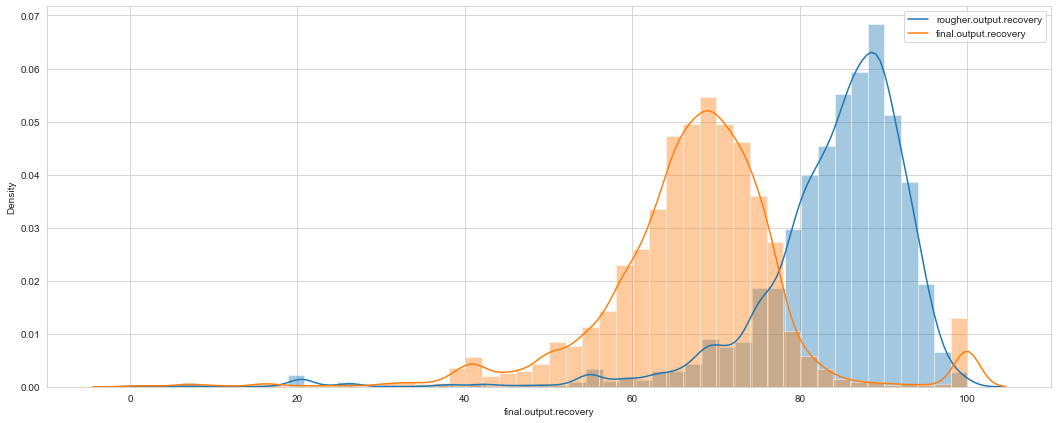

In [11]:
test_columns2 = ['rougher.output.recovery','final.output.recovery']
gold_recovery_full_mous = gold_recovery_full[test_columns2]

plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_full_mous['rougher.output.recovery'])
sns.distplot(gold_recovery_full_mous['final.output.recovery'])
plt.legend(['rougher.output.recovery', 'final.output.recovery'])
plt.show()

In [12]:
gold_recovery_full_mous2 = gold_recovery_full_mous.loc[(gold_recovery_full_mous['final.output.recovery'] <= 10)|(gold_recovery_full_mous['rougher.output.recovery'] <= 10)]
display(gold_recovery_full_mous2)

,rougher.output.recovery,final.output.recovery
date,,
2016-01-20 11:00:00,26.275908,0.213497
2016-01-30 16:00:00,76.837860,2.080672
2016-01-30 17:00:00,76.837860,2.080672
2016-01-30 18:00:00,76.837860,2.080672
2016-01-30 19:00:00,76.837860,2.080672
...,...,...
2018-05-10 08:59:59,66.608711,7.331817
2018-05-10 09:59:59,78.560827,7.331817
2018-05-15 04:59:59,62.966583,0.168611


In [13]:
gold_recovery_full_final = gold_recovery_full.loc[~gold_recovery_full.index.isin(gold_recovery_full_mous2.index)]
a0 = len(gold_recovery_full_final)
b0 = len(gold_recovery_full)
c0 = b0 - a0
print(c0)
display(gold_recovery_full_final)

90


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [14]:
gold_recovery_test_final0 = gold_recovery_full_final.loc[gold_recovery_full_final.index.isin(gold_recovery_test.index)]
#display(gold_recovery_test_final0[gold_recovery_test_final0.isna()])
gold_recovery_test_final = gold_recovery_test_final0.dropna()
a1 = len(gold_recovery_test_final)
b1 = len(gold_recovery_test)
c1 = b1 - a1
print(c1)
data_info(gold_recovery_test_final)

15
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5841 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5841 non-null   float64
 1   final.output.concentrate_pb                         5841 non-null   float64
 2   final.output.concentrate_sol                        5841 non-null   float64
 3   final.output.concentrate_au                         5841 non-null   float64
 4   final.output.recovery                               5841 non-null   float64
 5   final.output.tail_ag                                5841 non-null   float64
 6   final.output.tail_pb                                5841 non-null   float64
 7   final.output.tail_sol                               5841 non-null   float64
 8   final.output.tail_au                   

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,210.800909,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,215.392455,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,215.259946,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,215.336236,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,199.099327,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [15]:
gold_recovery_train_final0 = gold_recovery_full_final.loc[gold_recovery_full_final.index.isin(gold_recovery_train.index)]
gold_recovery_train_final = gold_recovery_train_final0.dropna()
a2 = len(gold_recovery_train_final)
b2 = len(gold_recovery_train)
c2 = b2 - a2
print(c2)
data_info(gold_recovery_train_final)

75
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16785 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16785 non-null  float64
 1   final.output.concentrate_pb                         16785 non-null  float64
 2   final.output.concentrate_sol                        16785 non-null  float64
 3   final.output.concentrate_au                         16785 non-null  float64
 4   final.output.recovery                               16785 non-null  float64
 5   final.output.tail_ag                                16785 non-null  float64
 6   final.output.tail_pb                                16785 non-null  float64
 7   final.output.tail_sol                               16785 non-null  float64
 8   final.output.tail_au                  

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [16]:
aaa = gold_recovery_full_final['primary_cleaner.output.concentrate_ag'].loc[gold_recovery_full_final['primary_cleaner.output.concentrate_ag'] == 0]
print(aaa)

Series([], Name: primary_cleaner.output.concentrate_ag, dtype: float64)


## Shift of concentration of Au, Ag, Pb during various stages of cleaning

Concentration of Ag is falling, Au is growing, Pb is evenly distributed.

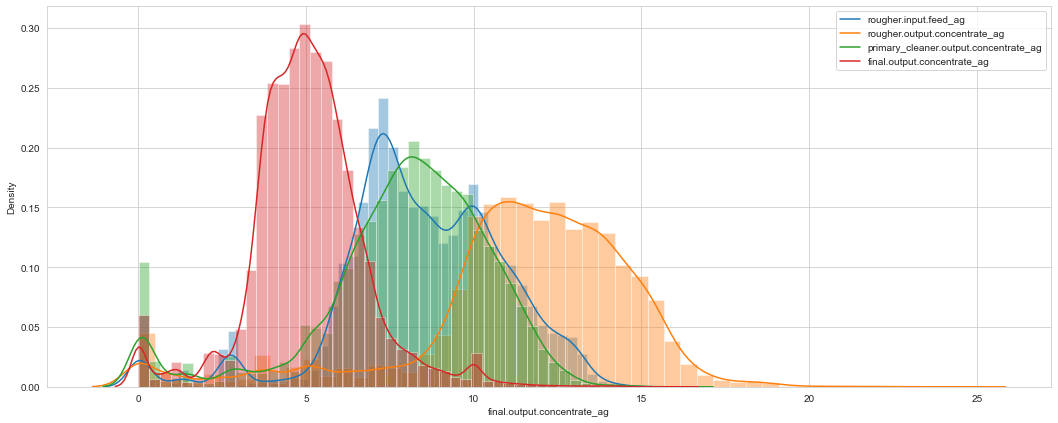

In [17]:
plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_full_final['rougher.input.feed_ag'])
sns.distplot(gold_recovery_full_final['rougher.output.concentrate_ag'])
sns.distplot(gold_recovery_full_final['primary_cleaner.output.concentrate_ag'])
sns.distplot(gold_recovery_full_final['final.output.concentrate_ag'])
plt.legend(['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'])
plt.show()

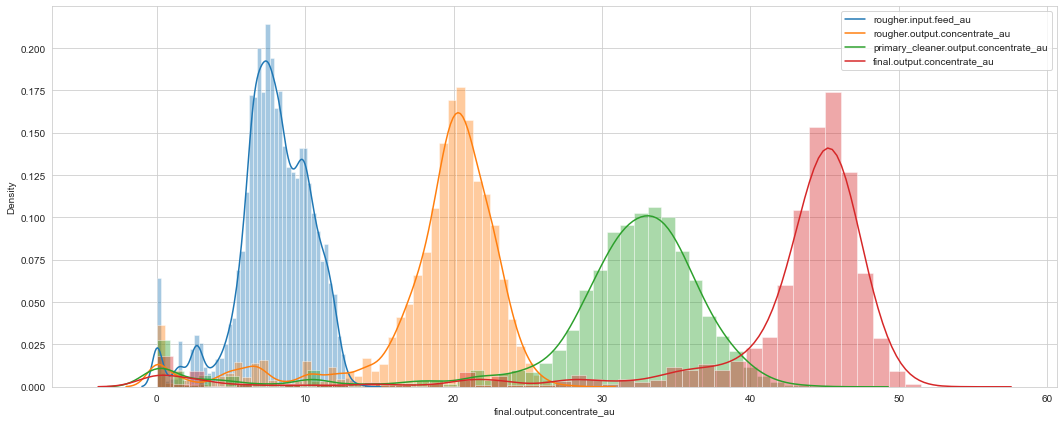

In [18]:
plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_full_final['rougher.input.feed_au'])
sns.distplot(gold_recovery_full_final['rougher.output.concentrate_au'])
sns.distplot(gold_recovery_full_final['primary_cleaner.output.concentrate_au'])
sns.distplot(gold_recovery_full_final['final.output.concentrate_au'])
plt.legend(['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'])
plt.show()

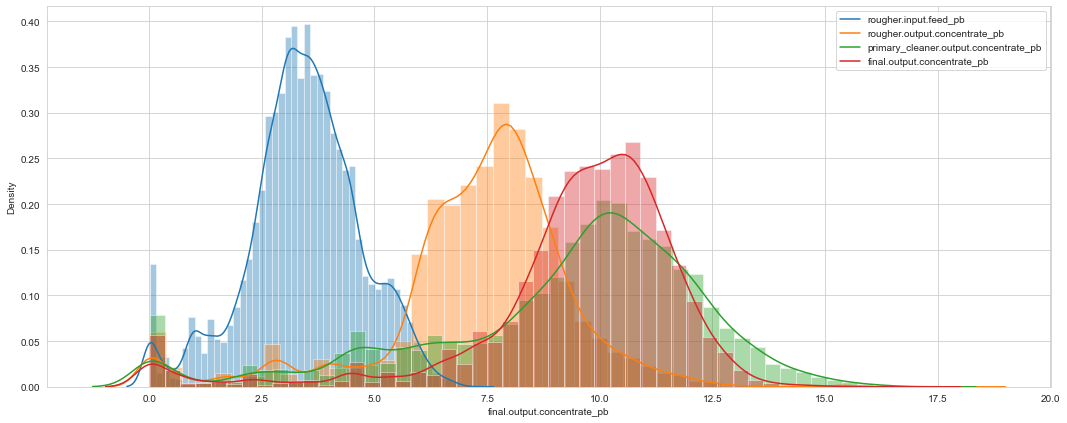

In [19]:
plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_full_final['rougher.input.feed_pb'])
sns.distplot(gold_recovery_full_final['rougher.output.concentrate_pb'])
sns.distplot(gold_recovery_full_final['primary_cleaner.output.concentrate_pb'])
sns.distplot(gold_recovery_full_final['final.output.concentrate_pb'])
plt.legend(['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'])
plt.show()

## Distribution of granules for train and test samples

Distributions are mostly indetical.

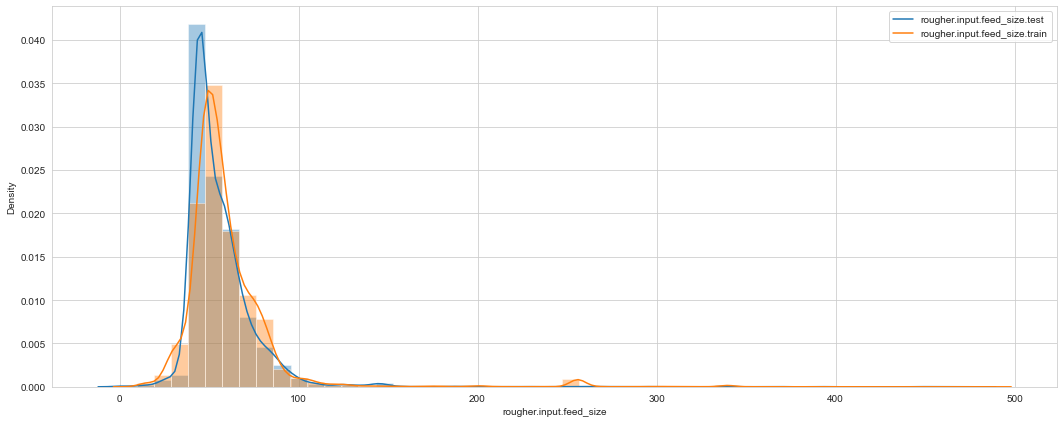

In [20]:
plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_test_final['rougher.input.feed_size'])
sns.distplot(gold_recovery_train_final['rougher.input.feed_size'])
plt.legend(['rougher.input.feed_size.test', 'rougher.input.feed_size.train'])
plt.show()

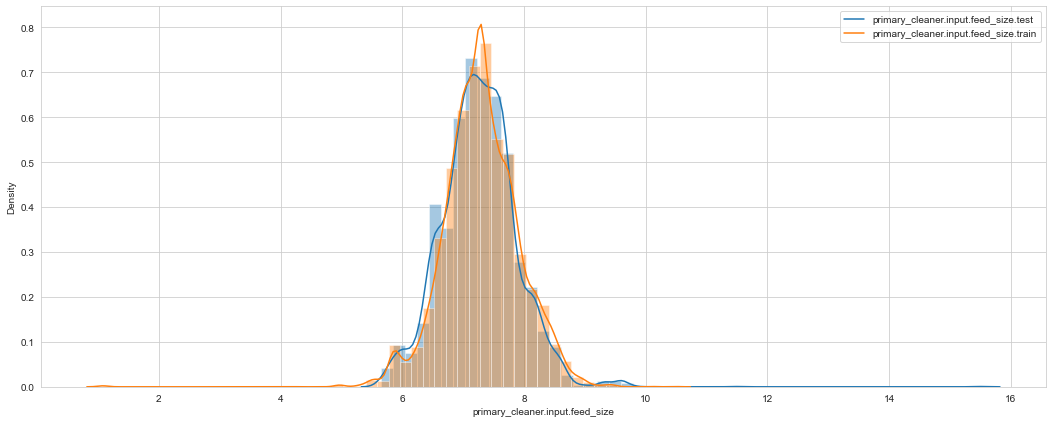

In [21]:
plt.figure(figsize=(18,7))
sns.set_style("whitegrid")
sns.distplot(gold_recovery_test_final['primary_cleaner.input.feed_size'])
sns.distplot(gold_recovery_train_final['primary_cleaner.input.feed_size'])
plt.legend(['primary_cleaner.input.feed_size.test', 'primary_cleaner.input.feed_size.train'])
plt.show()

Let's look at coorelation matrix.

In [22]:
corr_columns = ['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au','rougher.output.recovery','final.output.recovery']

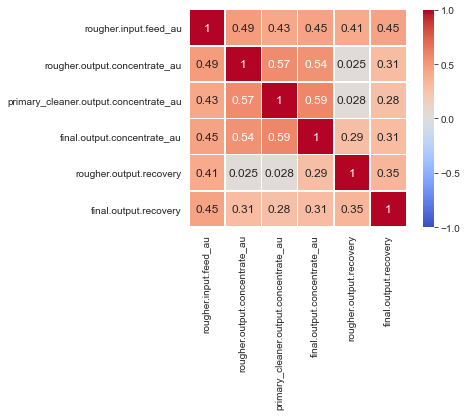

<Figure size 2160x1080 with 0 Axes>

In [23]:
corr_info(gold_recovery_test_final[corr_columns])

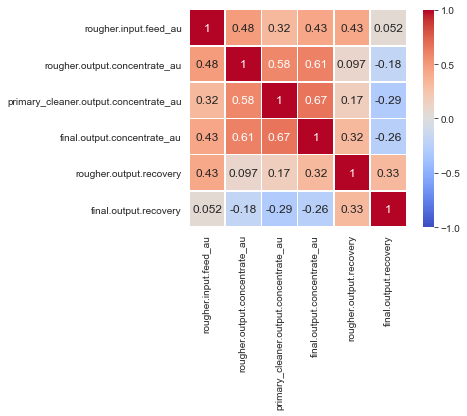

<Figure size 2160x1080 with 0 Axes>

In [24]:
corr_info(gold_recovery_train_final[corr_columns])

## Modelling.

Let's define SMAPE and calculate it.

In [25]:
PERCENT_ROUGHER = 0.25
PERCENT_FINAL = 0.75
def smape(target,predictions,**kwargs):
    return np.sum(2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions)))/len(target)

smape_score = make_scorer(smape, greater_is_better=True)

In [26]:
scaler = StandardScaler()

### Rougher

In [27]:
rougher_col = ['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']

In [28]:
features_train_rougher_non_scaled = gold_recovery_train_final[rougher_col]
features_train_rougher_non_scaled = features_train_rougher_non_scaled.drop('rougher.output.recovery', axis=1)
target_train_rougher = gold_recovery_train_final['rougher.output.recovery']
display(features_train_rougher_non_scaled)
display(target_train_rougher)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
2016-01-15 01:00:00,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2016-01-15 02:00:00,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
2016-01-15 03:00:00,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
2016-01-15 04:00:00,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.762770,9.158609,7.766744,9.156069,...,1149.807890,-498.789721,1047.963596,-498.413079,946.640977,-499.152477,849.664935,-499.214461,849.758091,-497.448664
2018-08-18 07:59:59,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,7.356687,9.304952,7.095508,9.297924,...,1147.675196,-500.608341,1048.565741,-500.932810,949.773589,-500.023144,848.515225,-500.289405,850.013123,-496.822119
2018-08-18 08:59:59,5.970515,4.020002,555.682872,122.262690,40.074026,4.525061,6.586020,9.299606,6.584130,9.300133,...,1149.942902,-501.717903,1049.604390,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 16785, dtype: float64

In [29]:
features_test_rougher_non_scaled = gold_recovery_test_final[rougher_col]
features_test_rougher_non_scaled = features_test_rougher_non_scaled.drop('rougher.output.recovery', axis=1)
target_test_rougher = gold_recovery_test_final['rougher.output.recovery'].reset_index(drop=True)
display(features_test_rougher_non_scaled)
display(target_test_rougher)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,...,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807
2016-09-01 01:59:59,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,...,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514
2016-09-01 02:59:59,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,...,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340
2016-09-01 03:59:59,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,...,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986
2016-09-01 04:59:59,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,...,1304.658848,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,11.638973,4.695306,521.685155,66.758479,42.022027,10.554544,10.109194,7.203935,10.110793,7.198171,...,1049.641991,-500.074887,951.923857,-499.648793,852.337438,-498.464443,851.436769,-500.285584,851.461345,-499.735650
2017-12-31 20:59:59,11.338091,4.478381,530.195798,62.560684,41.096377,10.254051,9.979495,7.200895,9.978855,7.201957,...,1055.715243,-498.250207,956.850266,-497.403941,855.386714,-495.702676,852.071335,-499.442753,851.328986,-496.579809
2017-12-31 21:59:59,11.285908,4.405327,546.306868,73.647513,41.095485,10.169094,10.182219,7.196255,10.185461,7.198676,...,1047.879742,-499.604248,948.963429,-499.549567,856.325597,-500.095616,850.614597,-499.473713,850.279578,-498.508374


0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5836    95.172585
5837    94.575036
5838    93.018138
5839    92.599042
5840    91.177695
Name: rougher.output.recovery, Length: 5841, dtype: float64

In [30]:
scaler.fit(features_train_rougher_non_scaled)
features_train_rougher = scaler.transform(features_train_rougher_non_scaled)
features_test_rougher = scaler.transform(features_test_rougher_non_scaled)

In [31]:
features_train_final_non_scaled = gold_recovery_train_final.drop(rougher_col, axis=1)
features_train_final_non_scaled = features_train_final_non_scaled.drop('final.output.recovery', axis=1)
target_train_final = gold_recovery_train_final['final.output.recovery']
display(features_train_final_non_scaled)
display(target_train_final)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,10.422762,0.883763,16.532835,2.146849,122.270188,11.322140,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,10.360302,0.792826,16.525686,2.055292,117.988169,11.913613,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


date
2016-01-15 00:00:00    70.541216
2016-01-15 01:00:00    69.266198
2016-01-15 02:00:00    68.116445
2016-01-15 03:00:00    68.347543
2016-01-15 04:00:00    66.927016
                         ...    
2018-08-18 06:59:59    73.755150
2018-08-18 07:59:59    69.049291
2018-08-18 08:59:59    67.002189
2018-08-18 09:59:59    65.523246
2018-08-18 10:59:59    70.281454
Name: final.output.recovery, Length: 16785, dtype: float64

In [32]:
features_test_final_non_scaled = gold_recovery_test_final.drop(rougher_col, axis=1)
features_test_final_non_scaled = features_test_final_non_scaled.drop('final.output.recovery', axis=1)
target_test_final = gold_recovery_test_final['final.output.recovery'].reset_index(drop=True)
display(features_test_final_non_scaled)
display(target_test_final)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,12.688885,3.844413,11.075686,4.537988,210.800909,14.993118,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,12.829171,3.918901,11.132824,4.675117,215.392455,14.987471,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,12.977846,4.026561,10.990134,4.828907,215.259946,12.884934,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,12.451947,3.780702,11.155935,4.969620,215.336236,12.006805,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,11.827846,3.632272,11.403663,5.256806,199.099327,10.682530,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,5.000174,9.710255,10.845459,46.400415,13.944836,3.373224,13.766506,3.890235,173.957757,15.963399,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,4.956679,9.727962,9.705617,46.657393,12.624143,2.974607,14.177795,3.809054,172.910270,16.002605,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,4.779534,9.818943,8.255551,47.337296,12.134647,2.843604,13.219960,3.909903,171.135718,15.993669,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


0       70.273583
1       68.910432
2       68.143213
3       67.776393
4       61.467078
          ...    
5836    68.919891
5837    68.440582
5838    67.092759
5839    68.061186
5840    71.699976
Name: final.output.recovery, Length: 5841, dtype: float64

In [33]:
scaler.fit(features_train_rougher_non_scaled)
features_train_final = scaler.transform(features_train_rougher_non_scaled)
features_test_final = scaler.transform(features_test_rougher_non_scaled)

### Choosing model.

In [34]:
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    smapes = []
    r2s = []
    maes = []
    mses = []
    accs = []
    for model in models:
        smape = np.round(cross_val_score(model, X, y, scoring=smape_score, cv=cv), 4)
        smapes.append(smape)
        smape_avg = round(smape.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        cv_accuracies[str(model)] = ["{:.3%}".format(smape_avg),r2_avg,mae_avg,mse_avg]
    cv_accuracies.index = ['smape', 'r2', 'mae', 'mse']
    return cv_accuracies

In [35]:
model_lin0 = LinearRegression()
model_tree_rougher0 = DecisionTreeRegressor(random_state = 123455)
model_forest_rougher0 = RandomForestRegressor(n_estimators = 10, random_state = 123455)
models = [model_lin0,model_tree_rougher0,model_forest_rougher0]

In [36]:
comp_rougher = cv_comparison(models, features_train_rougher, target_train_rougher, 4)
comp_rougher.columns = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor']

In [37]:
comp_final = cv_comparison(models, features_train_final, target_train_final, 4)
comp_final.columns = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor']

In [38]:
display(comp_rougher)
display(comp_final)

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
smape,7.100%,6.920%,4.820%
r2,0.259,-0.319,0.2727
mae,5.2963,4.7835,3.3414
mse,77.7133,126.7524,69.2457


,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
smape,10.660%,16.110%,11.180%
r2,-0.0288,-1.1728,-0.0114
mae,6.8971,10.2806,7.2016
mse,118.7549,235.7572,111.729


### Linear Regression.

In [39]:
model_lin = LinearRegression()

In [40]:
model_lin.fit(features_train_rougher, target_train_rougher)
predictions_rougher_lin = model_lin.predict(features_test_rougher)
predictions_rougher_lin = pd.Series(predictions_rougher_lin)
display(predictions_rougher_lin)
display(target_test_rougher)

0       89.755760
1       86.396303
2       86.636918
3       85.135776
4       81.304009
          ...    
5836    97.903553
5837    96.732701
5838    95.374006
5839    95.141229
5840    93.172666
Length: 5841, dtype: float64

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5836    95.172585
5837    94.575036
5838    93.018138
5839    92.599042
5840    91.177695
Name: rougher.output.recovery, Length: 5841, dtype: float64

In [41]:
mean_rougher_lin = predictions_rougher_lin.mean()
mse_rougher_lin = mean_squared_error(target_test_rougher, predictions_rougher_lin)
rmse_rougher_lin = mse_rougher_lin ** 0.5
mae_rougher_lin = mean_absolute_error(target_test_rougher, predictions_rougher_lin)
r2_rougher_lin = r2_score(target_test_rougher, predictions_rougher_lin)
smape_rougher_lin = smape(target_test_rougher, predictions_rougher_lin)
stats_rougher_lin = {'stats': ['smape','r2','mean','mse','rmse','mae'],
        'values': ["{:.3%}".format(smape_rougher_lin),"{:.3}".format(r2_rougher_lin),"{:.3}".format(mean_rougher_lin),"{:.3}".format(mse_rougher_lin),"{:.3}".format(rmse_rougher_lin),"{:.3}".format(mae_rougher_lin)]
        }
stats_rougher_lin = pd.DataFrame(stats_rougher_lin)
display(stats_rougher_lin)

,stats,values
0,smape,5.411%
1,r2,-1.15
2,mean,84.4
3,mse,1.06e+02
4,rmse,10.3
5,mae,3.79


In [42]:
model_lin.fit(features_train_final, target_train_final)
predictions_final_lin = model_lin.predict(features_test_final)
predictions_final_lin = pd.Series(predictions_final_lin)
display(predictions_final_lin)
display(target_test_final)

0       63.994199
1       61.717989
2       61.767910
3       62.898404
4       59.526854
          ...    
5836    77.019548
5837    76.780960
5838    74.791865
5839    73.706199
5840    73.183211
Length: 5841, dtype: float64

0       70.273583
1       68.910432
2       68.143213
3       67.776393
4       61.467078
          ...    
5836    68.919891
5837    68.440582
5838    67.092759
5839    68.061186
5840    71.699976
Name: final.output.recovery, Length: 5841, dtype: float64

In [43]:
mean_final_lin = predictions_rougher_lin.mean()
mse_final_lin = mean_squared_error(target_test_final, predictions_final_lin)
rmse_final_lin = mse_rougher_lin ** 0.5
mae_final_lin = mean_absolute_error(target_test_final, predictions_final_lin)
r2_final_lin = r2_score(target_test_final, predictions_final_lin)
smape_final_lin = smape(target_test_final, predictions_final_lin)
stats_final_lin = {'stats': ['smape','r2','mean','mse','rmse','mae'],
        'values': ["{:.3%}".format(smape_final_lin),"{:.3}".format(r2_final_lin),"{:.3}".format(mean_final_lin),"{:.3}".format(mse_final_lin),"{:.3}".format(rmse_final_lin),"{:.3}".format(mae_final_lin)]
        }
stats_final_lin = pd.DataFrame(stats_final_lin)
display(stats_final_lin)

,stats,values
0,smape,8.508%
1,r2,0.237
2,mean,84.4
3,mse,69.9
4,rmse,10.3
5,mae,5.5


In [44]:
smape_lin = (PERCENT_ROUGHER*smape_rougher_lin)+(PERCENT_FINAL*smape_final_lin)
print("Final sMAPE for linear regression: {:.3%}".format(smape_lin))

Final sMAPE for linear regression: 7.734%


### Forest Regression.

In [45]:
%%time
empty_forest_rougher = []
for depth in range(2, 8, 1):
    for estimator in range(10,50,5):
        model_forest_rougher_val = RandomForestRegressor(n_estimators = estimator, max_depth = depth, random_state = 123455)
        model_forest_cross_val_rougher = round(cross_val_score(model_forest_rougher_val, features_train_rougher, target_train_rougher, scoring=smape_score, cv=4).mean(),4)
        empty_forest_rougher.append([depth,estimator,model_forest_cross_val_rougher])

Wall time: 6min 52s


In [46]:
forest_rougher = pd.DataFrame(empty_forest_rougher,columns = ['depth','estimators','accuracy'])

In [47]:
forest_rougher_sorted = forest_rougher.sort_values(by = ['accuracy'],ascending = True)
display(forest_rougher_sorted)

,depth,estimators,accuracy
43,7,25,0.0540
42,7,20,0.0541
45,7,35,0.0542
47,7,45,0.0545
44,7,30,0.0548
41,7,15,0.0548
46,7,40,0.0548
40,7,10,0.0554
35,6,25,0.0586
34,6,20,0.0586


In [48]:
metrics_forest = []
model_forest_rougher = RandomForestRegressor(n_estimators = 20, max_depth = 7, random_state = 123455)
model_forest_rougher.fit(features_train_rougher, target_train_rougher)
model_forest_predict_rougher = model_forest_rougher.predict(features_test_rougher)
mean_forest_rougher = model_forest_predict_rougher.mean()
mse_forest_rougher = mean_squared_error(target_test_rougher, model_forest_predict_rougher)
rmse_forest_rougher = mse_forest_rougher ** 0.5
mae_forest_rougher = mean_absolute_error(target_test_rougher, model_forest_predict_rougher)
r2_forest_rougher = r2_score(target_test_rougher, model_forest_predict_rougher)
smape_forest_rougher = smape(target_test_rougher, model_forest_predict_rougher)
metrics_forest.append([smape_forest_rougher, "{:.3}".format(r2_forest_rougher),"{:.3}".format(mean_forest_rougher),mse_forest_rougher,"{:.3}".format(rmse_forest_rougher),"{:.3}".format(mae_forest_rougher)])
metrics_forest_rougher = pd.DataFrame(metrics_forest,columns = ['smape','r2','mean','mse','rmse','mae'])
display(metrics_forest_rougher)

,smape,r2,mean,mse,rmse,mae
0,0.036638,0.178,84.9,40.552177,6.37,2.79


In [49]:
%%time
empty_forest_final = []
for depth in range(2, 8, 1):
    for estimator in range(10,50,5):
        model_forest_final_val = RandomForestRegressor(n_estimators = estimator, max_depth = depth, random_state = 123455)
        model_forest_cross_val_final = round(cross_val_score(model_forest_final_val, features_train_final, target_train_final, scoring=smape_score, cv=4).mean(),4)
        empty_forest_final.append([depth,estimator,model_forest_cross_val_final])

Wall time: 9min 46s


In [50]:
forest_final = pd.DataFrame(empty_forest_final,columns = ['depth','estimators','accuracy'])

In [51]:
forest_final_sorted = forest_final.sort_values(by = 'accuracy',ascending = True)
display(forest_final_sorted)

,depth,estimators,accuracy
47,7,45,0.1039
44,7,30,0.1043
46,7,40,0.1043
39,6,45,0.1044
43,7,25,0.1046
36,6,30,0.1047
38,6,40,0.1047
45,7,35,0.1048
35,6,25,0.1048
37,6,35,0.1051


In [52]:
metrics_final = []
model_forest_final = RandomForestRegressor(n_estimators = 45, max_depth = 7, random_state = 123455)
model_forest_final.fit(features_train_final, target_train_final)
model_forest_predict_final = model_forest_final.predict(features_test_final)
mean_forest_final = model_forest_predict_final.mean()
mse_forest_final = mean_squared_error(target_test_final, model_forest_predict_final)
rmse_forest_final = mse_forest_final ** 0.5
mae_forest_final = mean_absolute_error(target_test_final, model_forest_predict_final)
r2_forest_final = r2_score(target_test_final, model_forest_predict_final)
smape_forest_final = smape(target_test_final, model_forest_predict_final)
metrics_final.append([smape_forest_final, "{:.3}".format(r2_forest_final),"{:.3}".format(mean_forest_final),mse_forest_final,"{:.3}".format(rmse_forest_final),"{:.3}".format(mae_forest_final)])
metrics_forest_final = pd.DataFrame(metrics_final,columns = ['smape','r2','mean','mse','rmse','mae'])
display(metrics_forest_final)

,smape,r2,mean,mse,rmse,mae
0,0.081787,0.319,68.1,62.408392,7.9,5.2


In [53]:
smape_forest = (PERCENT_ROUGHER*(metrics_forest_rougher['smape']).min())+(PERCENT_FINAL*(metrics_forest_final['smape']).min())
print("sMAPE for random forest: {:.3%}".format(smape_forest))

sMAPE for random forest: 7.050%


# Conclusions.

In [54]:
print("sMAPE for linear regression: {:.3%}".format(smape_lin))
print("sMAPE for forest: {:.3%}".format(smape_forest))

sMAPE for linear regression: 7.734%
sMAPE for forest: 7.050%
